# Chapter 4 
 Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Multivariate Statistical Process Control

In [2]:
import mistat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Introduction

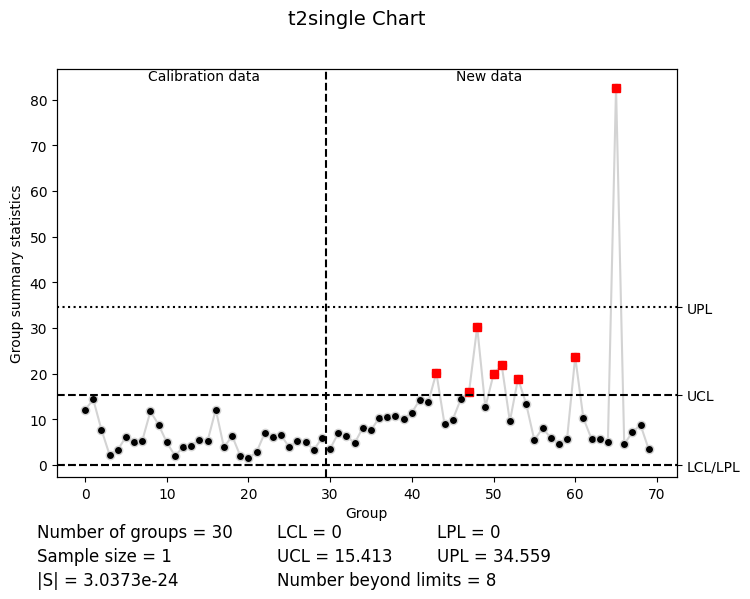

In [3]:
almpin = mistat.load_data('ALMPIN')

base = almpin.iloc[:30,]
newdata = almpin.iloc[30:,]

mqcc = mistat.MultivariateQualityControlChart(base, qcc_type='T2single',
           confidence_level=0.997, newdata=newdata)
mqcc.plot()
plt.show()

## A Review Multivariate Data Analysis

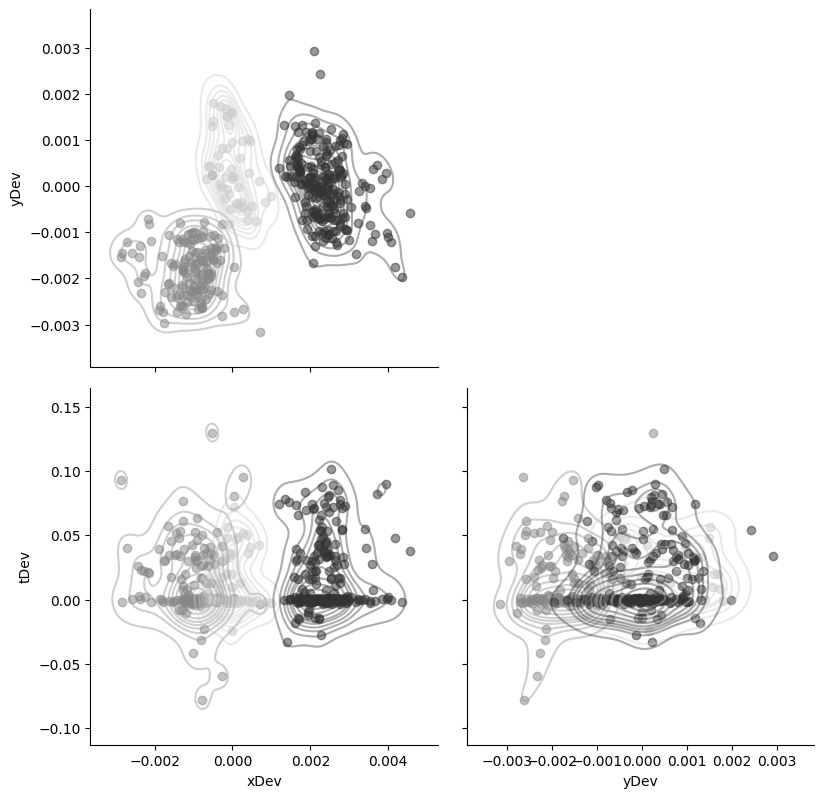

In [4]:
place = mistat.load_data('PLACE')
place['code'] = [*['lDev'] * 9 * 16, *['mDev'] * 3 * 16, *['hDev'] * 14 * 16, ]

def plotOffdiagonal(x, y, label=None, color=None):
    sns.kdeplot(x=x, y=y, color=color, alpha=0.4)
    plt.scatter(x=x, y=y, color=color, alpha=0.5)

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

g = sns.PairGrid(place.drop(columns=['crcBrd']), hue='code', height=4,
                palette=['#888888', '#cccccc', '#333333'])
g.map_upper(hide_current_axis)
g.map_lower(plotOffdiagonal)
for i in range(3):
    g.axes[i, i].set_visible(False)
plt.show()

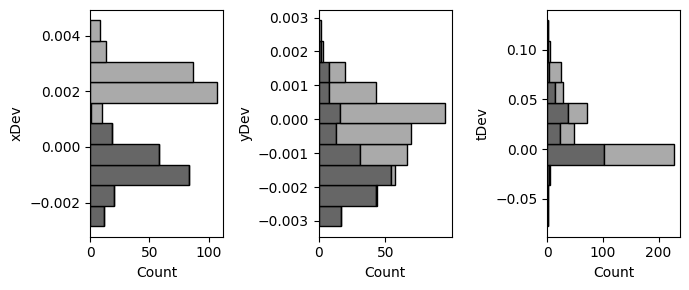

In [5]:
place = mistat.load_data('PLACE')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

low = place['xDev'] < 0.001
high = place['xDev'] >= 0.001

for i, column in enumerate(['xDev', 'yDev', 'tDev']):
    axes[i].hist([place.loc[low, column], place.loc[high, column]],
                 orientation='horizontal', bins=10, stacked=True,
                 color=['#666666', '#aaaaaa'], edgecolor='black')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

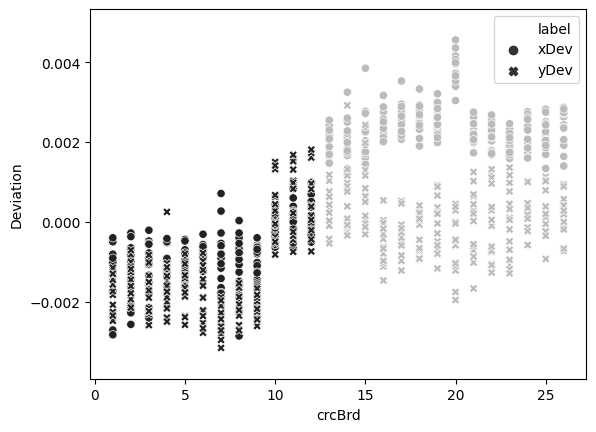

In [6]:
place = mistat.load_data('PLACE')

low = place['xDev'] < 0.001
high = place['xDev'] >= 0.001
xDev = place.copy()
xDev['Deviation'] = xDev['xDev']
xDev['label'] = 'xDev'
yDev = place.copy()
yDev['Deviation'] = yDev['yDev']
yDev['label'] = 'yDev'

place2 = pd.concat([xDev, yDev])
place2['level'] = ['low' if x < 0.001 else 'high' for x in place2['xDev']]

ax = sns.scatterplot(x="crcBrd", y="Deviation", style='label', data=place2,
                     hue='level', palette=['#222222', '#bbbbbb'], legend='full')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:])

dy = 0.1 * (max(place2['Deviation']) - min(place2['Deviation']))
ax.set_ylim(min(place2['Deviation']) - dy, max(place2['Deviation']) + dy)
plt.show()

## Multivariate Process Capability Indices

## Advanced Applications of Multivariate Control Charts

### Multivariate Control Charts Scenarios

### Internally Derived Targets

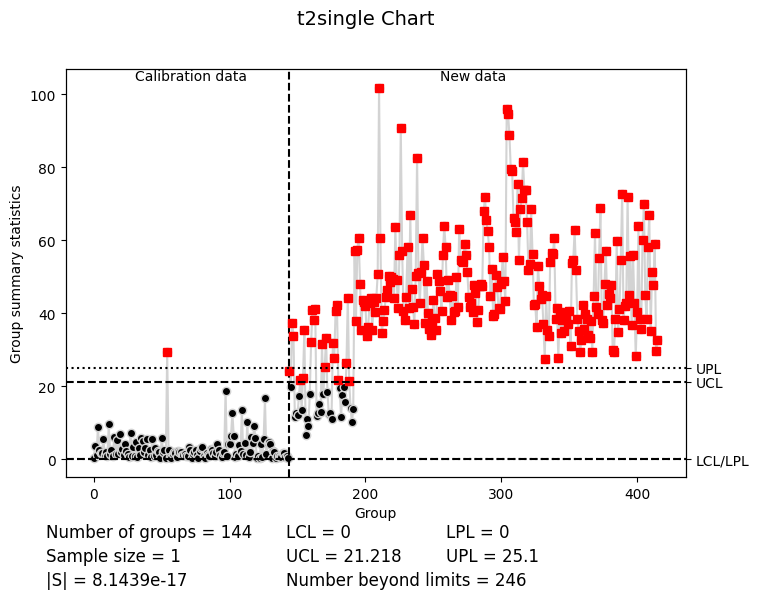

In [7]:
place = mistat.load_data('PLACE')

columns = ['xDev', 'yDev', 'tDev']
calibration = place[place.crcBrd <= 9][columns]
newdata = place[place.crcBrd > 9][columns]

mqcc = mistat.MultivariateQualityControlChart(calibration,
        qcc_type='T2single', newdata=newdata,
        confidence_level=(1-0.0000152837)**3)
mqcc.plot()
plt.show()

### Using an External Reference Sample

### Externally Assigned Targets

### Measurement Units Considered as Batches

### Variable Decomposition and Monitoring Indices

## Multivariate Tolerance Specifications

In [8]:
diss = mistat.load_data('DISS')
columns = ['batch', 'min15', 'min90']

mahalanobisT2 = mistat.MahalanobisT2(diss[columns], 'batch',
    compare_to=[15,15], conf_level=0.95)
mahalanobisT2.summary()

Coordinates
            min15     min90
LCR     14.558418 -2.810708
Center  17.541667 -3.386667
UCR     20.524915 -3.962625

Mahalanobis
LCR        8.664879
Center    10.440449
UCR       12.216019
dtype: float64

 comparison: 9.6308


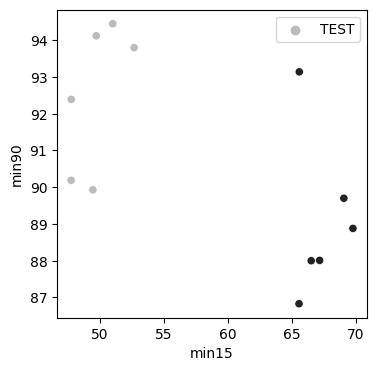

In [9]:
diss = mistat.load_data('DISS')

fig, ax = plt.subplots(figsize=[4, 4])
sns.scatterplot(x='min15', y='min90', hue='batch', data=diss,
                palette=['#222222', '#bbbbbb'], legend='brief', ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

plt.show()

In [10]:
def to_coord_rep(coord):
    return f'({coord[0]:.2f}, {coord[1]:.2f})'
center_s = to_coord_rep(mahalanobisT2.coord.loc['Center', :])
lcr_s = to_coord_rep(mahalanobisT2.coord.loc['LCR', :])
ucr_s = to_coord_rep(mahalanobisT2.coord.loc['UCR', :])

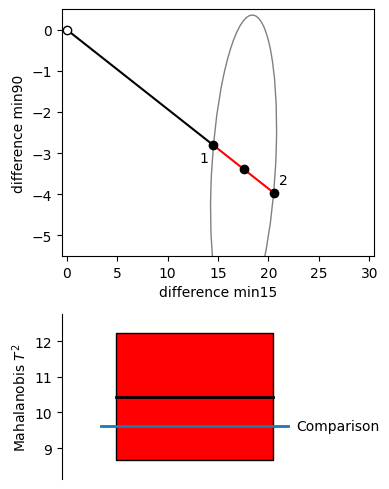

In [11]:
axes = mahalanobisT2.plot()
axes[0].set_ylim(-5.5, 0.5)
axes[0].set_xlim(-0.5, 30.5)

delta = np.array([1, 0.3])
axes[0].text(*(mahalanobisT2.coord.loc['LCR',:]-delta), '1', ha='center', va='center')
axes[0].text(*(mahalanobisT2.coord.loc['UCR',:]+delta), '2', ha='center', va='center')

plt.show()

## Tracking structural changes

### The Synthetic Control Method

## Chapter Highlights

## Exercises